In [102]:
# HOME
import os
import scipy
# get the code
import sys
sys.path.append('../code')
from plot import plot_genomic

home = '/Users/mahtin'
home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# tool-specific paths
shell_path = "../shell"
# 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

In [103]:
cnvPON_path

'/Users/martinscience/mount/scratch/develop/PONcoverage/chromCov'

## get the coverage and SNP data

In [199]:
sample = "01_A"
snp_df = pd.read_csv(os.path.join(output_path, 'heteroSNP/01_A.snp'), sep='\t').drop('FullExonPos', axis=1)
snp_df['VAF'] = snp_df['orgVAF']
snp_df = snp_df.drop('orgVAF', axis=1)
cov_df = pd.read_csv(os.path.join(output_path, 'covDif/01_A.cov'), sep='\t')

In [200]:
cov_df

Chr        Pos  FullExonPos  ExonPos   Coverage  PONmeanCov  \
0       chr1      12650          220      220   0.066480    0.005664   
1       chr1      12700          270      270   0.149581    0.024506   
2       chr1      12750          320      320   0.831005    0.016357   
3       chr1      13450          365      365  23.068687   10.565648   
4       chr1      13500          415      415  29.420886   14.981521   
...      ...        ...          ...      ...        ...         ...   
955639  chrX  155381950     49459154  1824691   0.000000    0.000000   
955640  chrX  155458750     49461260  1826797   0.000000    0.000000   
955641  chrX  155458800     49461310  1826847   0.000000    0.011319   
955642  chrX  155458850     49461360  1826897   0.000000    0.019440   
955643  chrX  155458900     49461410  1826947   0.000000    0.041860   

        PONmedianCov    PONstd  log2ratio  
0           0.000000  0.018137   3.552918  
1           0.000000  0.070519   2.609726  
2           0.000000  0.053281   5.666868  
3          10.013362  4.855861   1.126555  
4          14.981521  6.335329   0.973657  
...              ...       ...        ...  
955639      0.000000  0.000000        NaN  
955640      0.000000  0.000000        NaN  
955641      0.000000  0.026309        NaN  
955642      0.000000  0.053035        NaN  
955643      0.000000  0.123197        NaN  

[955644 rows x 9 columns]

In [226]:
snp_df.query('VAF == 0.5')

Chr        Pos  ExonPos  Depth  VAF
1250     chr1    1757074   118569    148  0.5
3400     chr1   12006987   410374    244  0.5
5918     chr1   20589208   700224    106  0.5
8296     chr1   31658996  1043921    196  0.5
13102    chr1   56792144  1772178    358  0.5
...       ...        ...      ...    ...  ...
325914  chr22   49620721   975231    158  0.5
327668   chrX    2917996    34859    386  0.5
331357   chrX   69162993   802921    446  0.5
332311   chrX   92618944  1031721    710  0.5
334190   chrX  132097229  1462744    302  0.5

[333 rows x 5 columns]

## CovDiv rolling window

In [202]:
cov_df.sort_values('FullExonPos')[:10]

Chr    Pos  FullExonPos  ExonPos   Coverage  PONmeanCov  PONmedianCov  \
96621  chr1  12600          170      170   0.000000    0.000000      0.000000   
0      chr1  12650          220      220   0.066480    0.005664      0.000000   
1      chr1  12700          270      270   0.149581    0.024506      0.000000   
2      chr1  12750          320      320   0.831005    0.016357      0.000000   
3      chr1  13450          365      365  23.068687   10.565648     10.013362   
4      chr1  13500          415      415  29.420886   14.981521     14.981521   
5      chr1  13550          465      465  34.227416   18.105937     17.754565   
6      chr1  13600          515      515  34.132682   17.593200     17.593200   
7      chr1  13650          565      565  28.210943   13.517399     13.517399   
8      chr1  14700          606      606  27.911782   14.335685     14.002403   

         PONstd  log2ratio  
96621  0.000000        NaN  
0      0.018137   3.552918  
1      0.070519   2.609726  
2      0.053281   5.666868  
3      4.855861   1.126555  
4      6.335329   0.973657  
5      7.737376   0.918690  
6      7.753357   0.956136  
7      6.162109   1.061437  
8      5.515341   0.961263

### visualize the data

In [203]:
chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']

fig_params = dict(
    figsize=(50,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-1.5,2.5)
)

#### whole exome

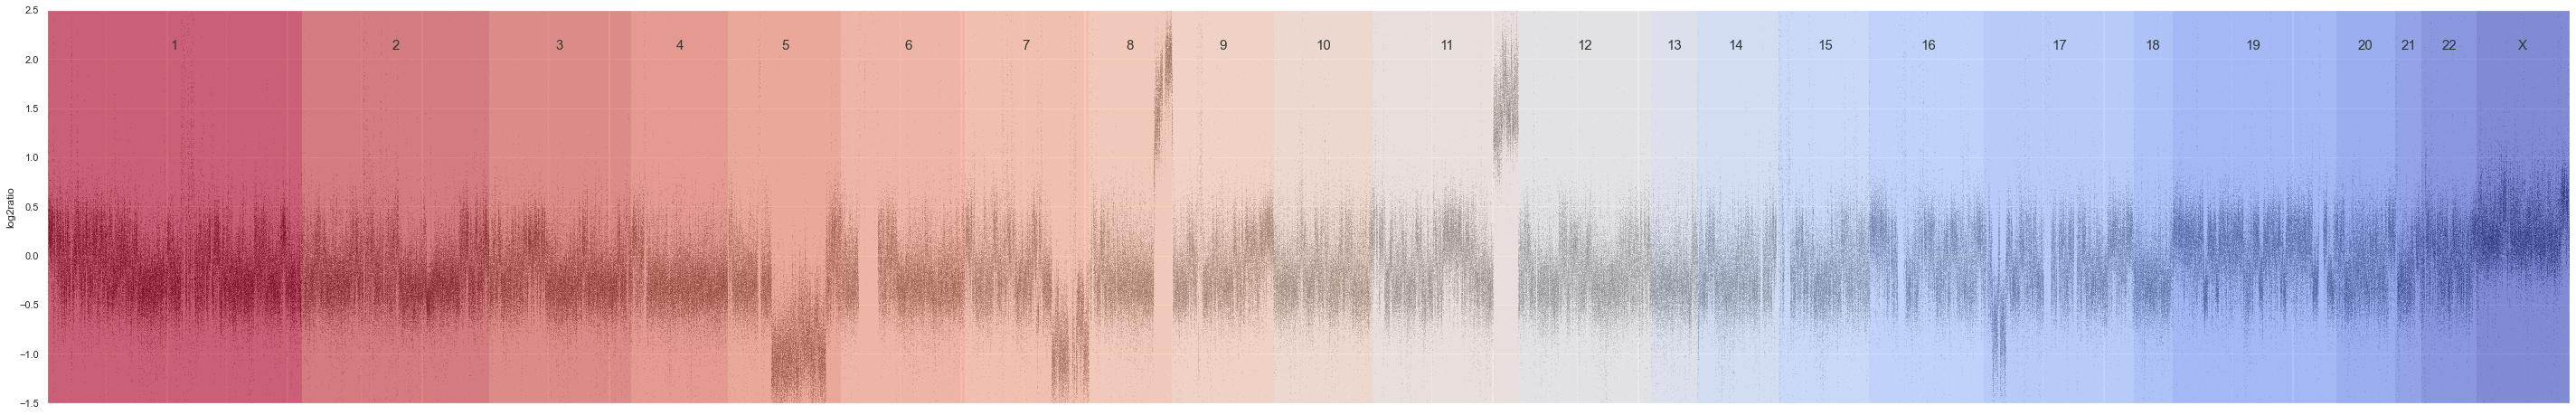

In [204]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.3
        )
    )


plots = [
    log2
]

fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms='all', region='', **fig_params)

#### zoom in on interesting feats

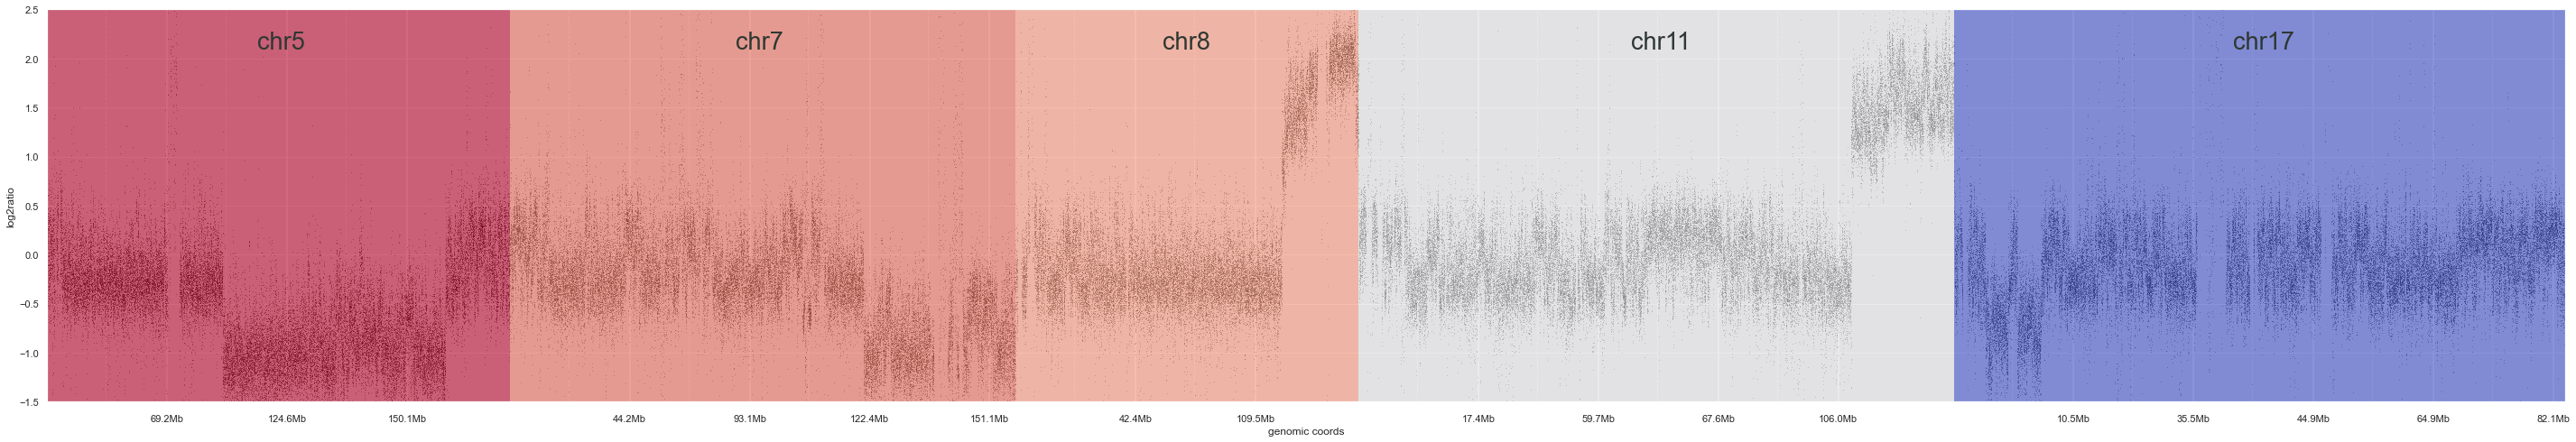

In [205]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.7
        ))

plots = [
    log2
]

fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms=chroms, region='', **fig_params)

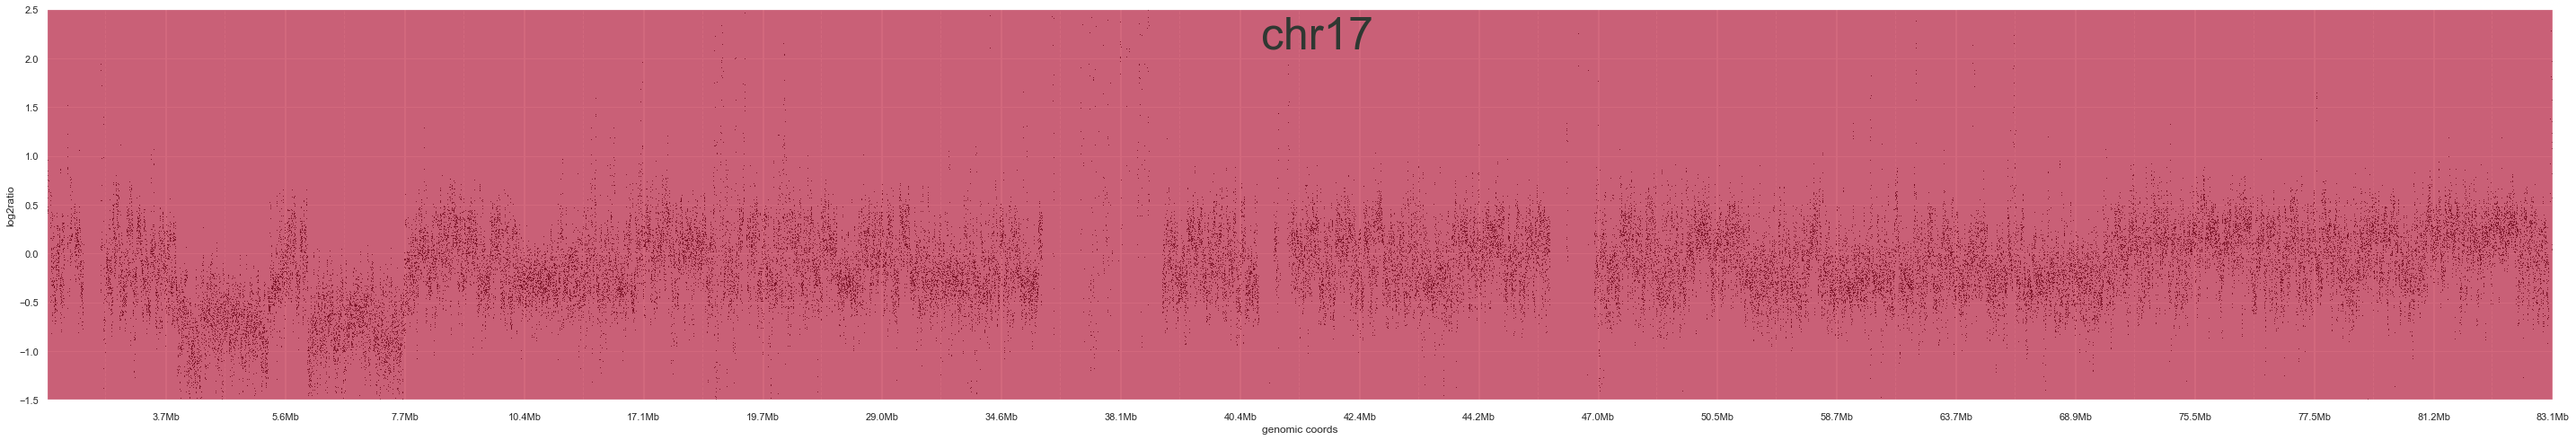

In [206]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.4,
            alpha=1
        ))

plots = [
    log2
]

fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms=chroms, region='chr17', **fig_params)

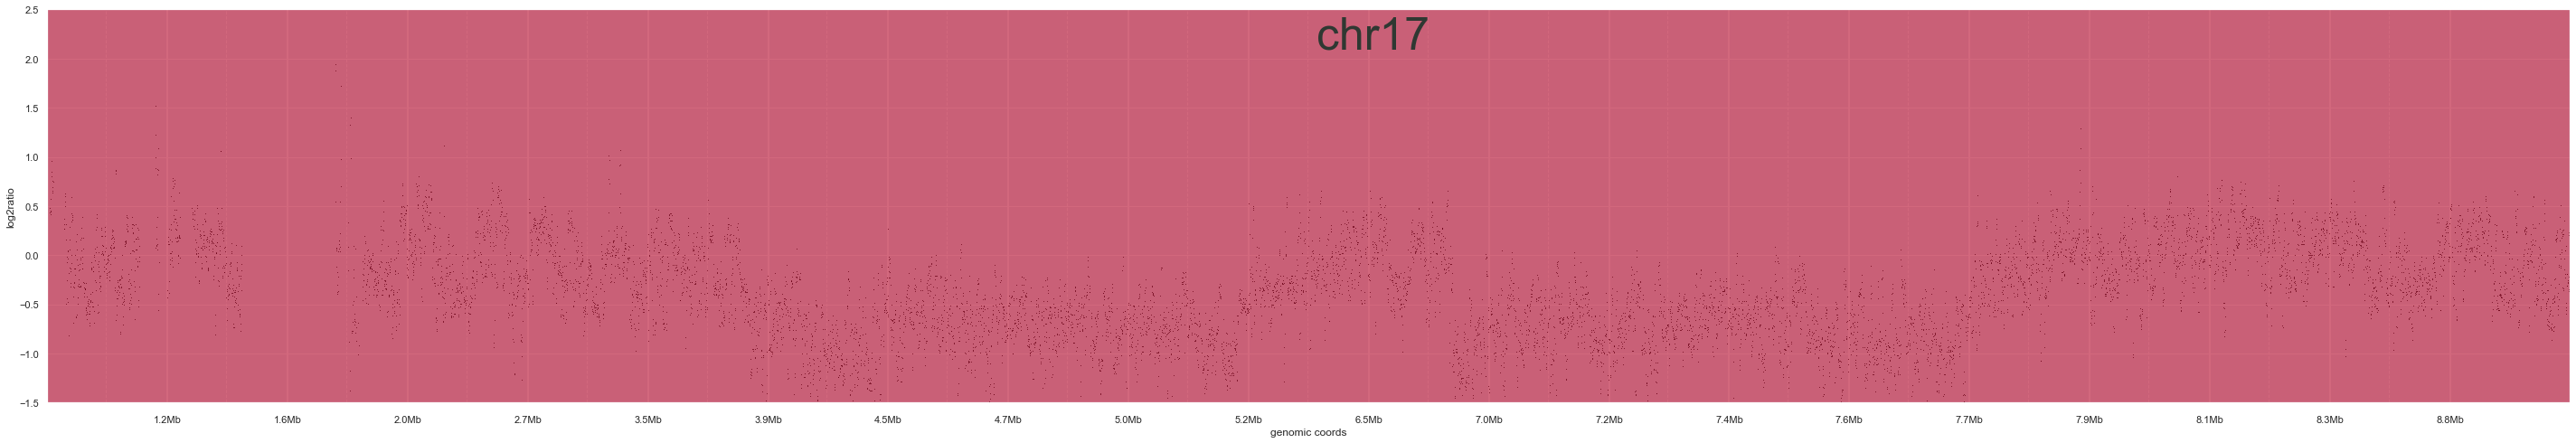

In [207]:
plots = [
    log2
]
r1 = 'chr17:0-10Mb'
fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms=chroms, region=r1, **fig_params)

## rolling window for log2ratio
#### compute the mean for log2ratio
+ this is all done on chromosome-basis
+ the rolling should be performed on coverage data filtered for:
    * minimal coverage
    * minimal coverage in PON samples
    * maximal std of PON coverage

In [208]:
def interpolate(df, data_col, ref_col='FullExonPos', expand_limit=20):
    cols = list(df.columns)
    # set FullExonPos as index for the interpolation method to work on proper intervals
    df = df.set_index(ref_col)
    df.loc[:,data_col] = df[data_col].interpolate(method='values', limit=expand_limit, limit_direction='both')
    return df.reset_index()[cols]


def one_col_rolling(df, df_filter, col, agg, window_size=200, expand_limit=20, normalize=False, debug=False):

    
    #
    org_cols = list(df.columns)
    # rolling left
    # get the right computation by passing agg to .agg()
    # only this allows passing methods as string
    df.loc[:,'L'] = df_filter[col].rolling(window_size).agg(agg)
    # rolling right by shifting the L column
    df.loc[:, 'R'] = df.shift(-window_size + 1)['L']
    
    
    col_name = col + agg
    diff_name = col_name + "Diff"
    new_cols = org_cols +[col_name, diff_name]
    if debug:
        new_cols += [f'{col_name}L', f'{col_name}R']
    # skips interpolation if value == 0
    if interpolate:
        # interpolate missing values
        for c in ['L', 'R']:
            df = interpolate(df, c, expand_limit=expand_limit)
    
    # normalize values 
    # not good for coverage and VAF
    if normalize:
    # normalize the data
        print('Normalizing data')
        _min = df['L'].min()
        _max = df['L'].max()
        for c in ['L', 'R']:
            df.loc[:,c] = (df[c] - _min) / (_max - _min)
            
    # get the Diff
    df.loc[:,diff_name] = ((df['R'] - df['L']) ** 2)
    df.loc[:,diff_name] = df[diff_name] / df[diff_name].max()
    # here, contribution of L and R is controlled by diff value
    df.loc[:,col_name] = df['R'] * df[diff_name] + df['L'] * (1 - df[diff_name])
    
    # reduce to the right columns
    df = df.rename(columns=dict(L=f'{col_name}L', R=f'{col_name}R'))
    return df[new_cols]
    

def rolling_coverage(cov_df, config):
    '''
    cycle through the chroms and perform rolling window computations of data set in config
    '''
    
    # split the params dict for easier access
    params = config['coverage']
    filter_params = params['filter']
    data_params = params['data']
    chrom_dfs = []
    for chrom in cov_df['Chr'].unique():
        # restrict to chrom
        chrom_df = cov_df.query('Chr == @chrom').sort_values('FullExonPos')
        # get the params for filtering
        min_cov = filter_params['min_cov']
        min_PON_cov = filter_params['min_PON_cov']
        max_PON_std = filter_params['max_PON_std']
        
        # filter df
        filter_df = chrom_df.query('Coverage >= @min_cov and PONmeanCov >= @min_PON_cov and PONstd < @max_PON_std')
        for data_col in data_params.keys():
            for agg in data_params[data_col].keys():
                window_size = data_params[data_col][agg]
                expand_limit = int(params['expand'] * window_size)
                # print(f"Computing rolling window for {agg} of {data_col} with window size {window_size} on {chrom}")
                chrom_df = one_col_rolling(chrom_df, filter_df, data_col, agg, window_size=window_size, expand_limit=expand_limit, normalize=params['normalize'], debug=config['debug'])
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    return df

In [209]:
########### CONFIG ##################
# put all the parameters for the rolling into a dict
# needs to contain:
# - filter criteria for the data to be used for rolling
# - the actual data columns with
#   - and interpolation size
config = {
    'debug': True, # also export the left and right rolling window values (L/R)
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 50,
            max_PON_std = 100,
        ),
        'normalize':False,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':100
            }
        }
    }
}

cov2_df = rolling_coverage(cov_df, config)
cov2_df

Chr        Pos  FullExonPos  ExonPos   Coverage  PONmeanCov  \
0      chr1      12600          170      170   0.000000    0.000000   
1      chr1      12650          220      220   0.066480    0.005664   
2      chr1      12700          270      270   0.149581    0.024506   
3      chr1      12750          320      320   0.831005    0.016357   
4      chr1      13450          365      365  23.068687   10.565648   
...     ...        ...          ...      ...        ...         ...   
35235  chrX  156027400     49470607  1836144  15.888807   19.728755   
35236  chrX  156027450     49470657  1836194  11.472849   14.004968   
35237  chrX  156027800     49470677  1836214   1.435976    0.986178   
35238  chrX  156027850     49470727  1836264   1.647051    1.364040   
35239  chrX  156027900     49470777  1836314   1.151772    1.412005   

       PONmedianCov     PONstd  log2ratio  log2ratiomean  log2ratiomeanDiff  \
0          0.000000   0.000000        NaN            NaN                NaN   
1          0.000000   0.018137   3.552918            NaN                NaN   
2          0.000000   0.070519   2.609726            NaN                NaN   
3          0.000000   0.053281   5.666868            NaN                NaN   
4         10.013362   4.855861   1.126555            NaN                NaN   
...             ...        ...        ...            ...                ...   
35235     20.361351  10.033581  -0.312289            NaN                NaN   
35236     13.481556   8.870232  -0.287715            NaN                NaN   
35237      0.972217   0.729641   0.542112            NaN                NaN   
35238      1.369064   0.998951   0.271999            NaN                NaN   
35239      1.315799   1.061488  -0.293889            NaN                NaN   

       log2ratiomeanL  log2ratiomeanR  
0                 NaN             NaN  
1                 NaN             NaN  
2                 NaN             NaN  
3                 NaN             NaN  
4                 NaN             NaN  
...               ...             ...  
35235       -0.092123             NaN  
35236       -0.092123             NaN  
35237       -0.092123             NaN  
35238       -0.092123             NaN  
35239       -0.092123             NaN  

[955644 rows x 13 columns]

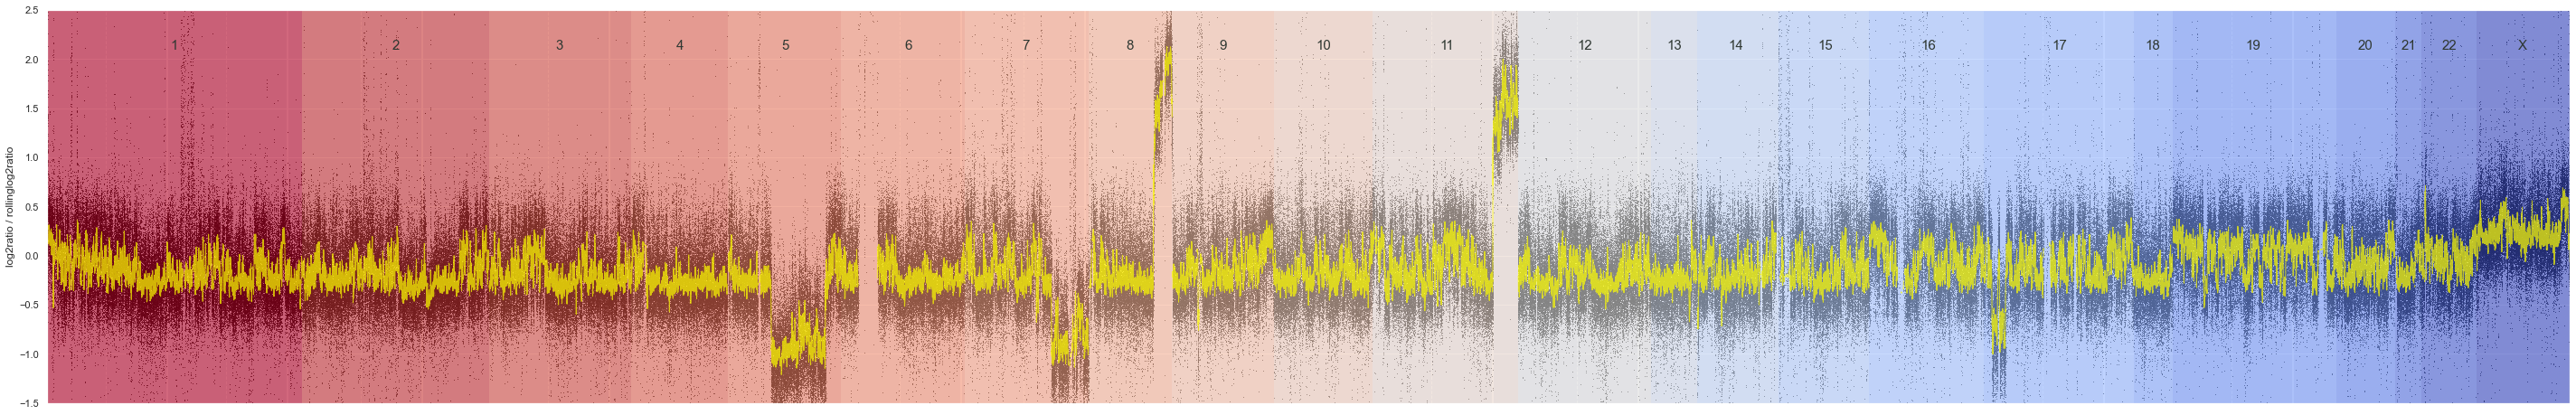

In [210]:
log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )


log2diff = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomeanDiff',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        ))

log2L = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomeanL',
        plot_args=dict(
            linewidth=1,
            color='white',
            alpha=.7
        ))

log2R = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomeanR',
        plot_args=dict(
            linewidth=1,
            color='black',
            alpha=.7
        ))

plots = [
    log2,
    log2mean
]

r1 = 'chr17:0-10Mb'
_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms='all', region='', **fig_params)

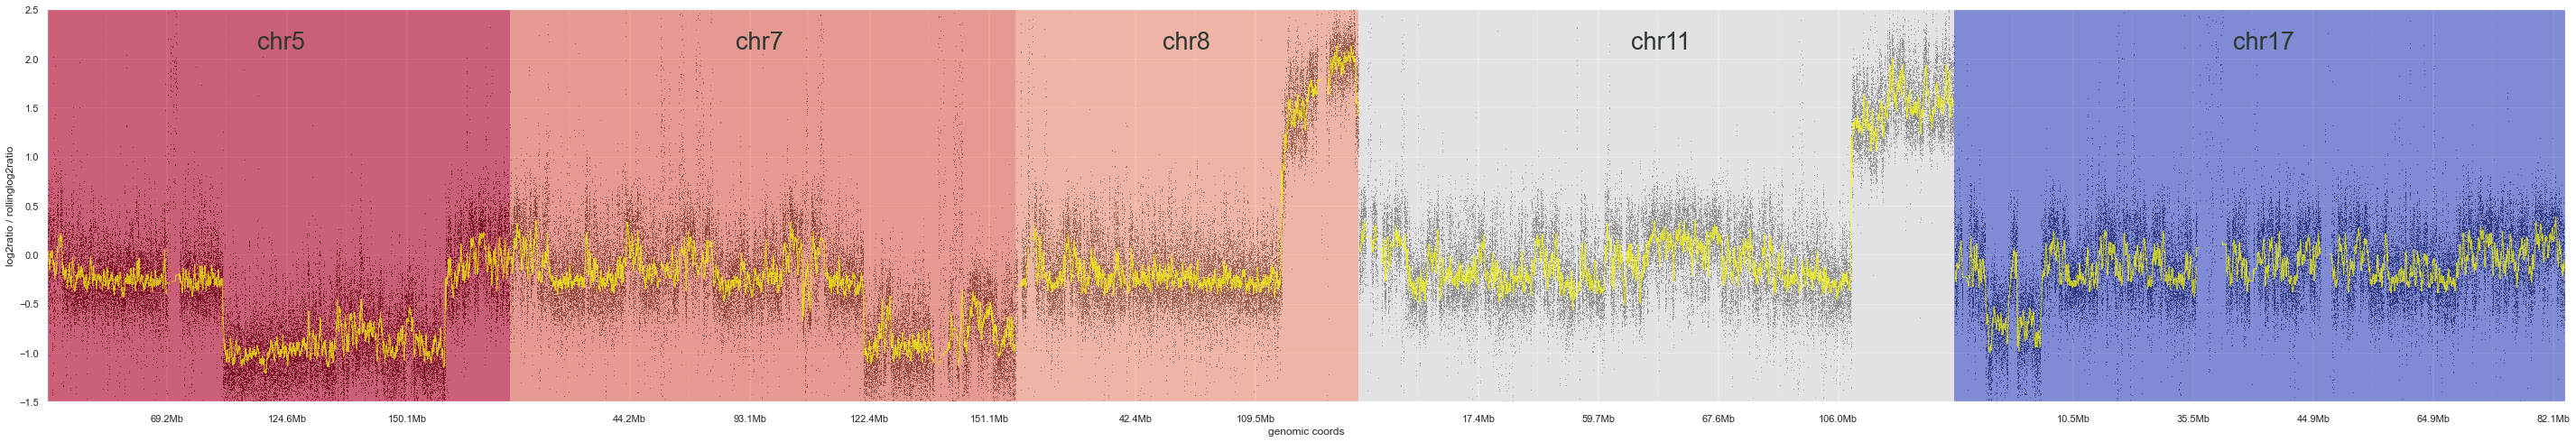

In [211]:
_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region='', **fig_params)

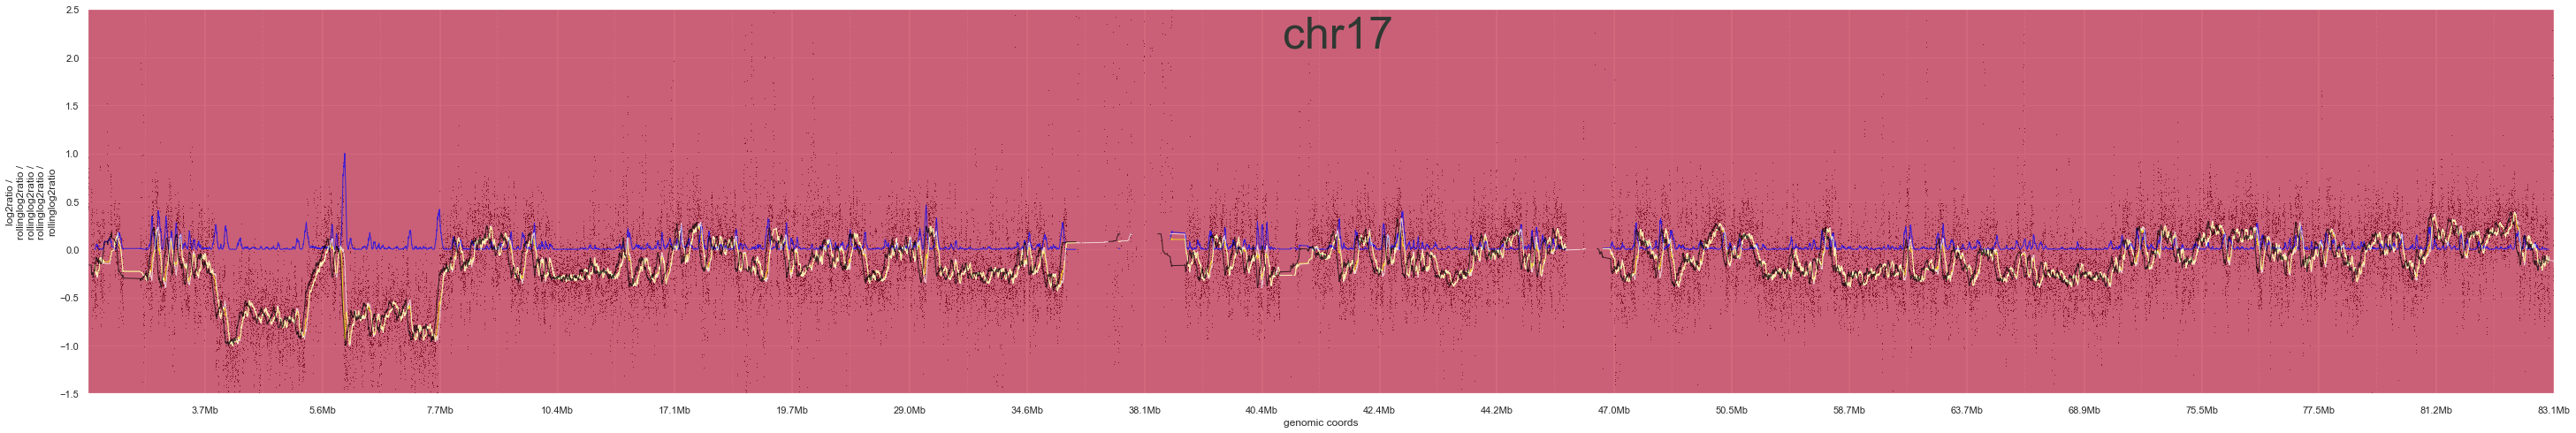

In [212]:
plots = [
    log2,
    log2mean,
    log2diff,
    log2L,
    log2R
]

_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region='chr17', **fig_params)

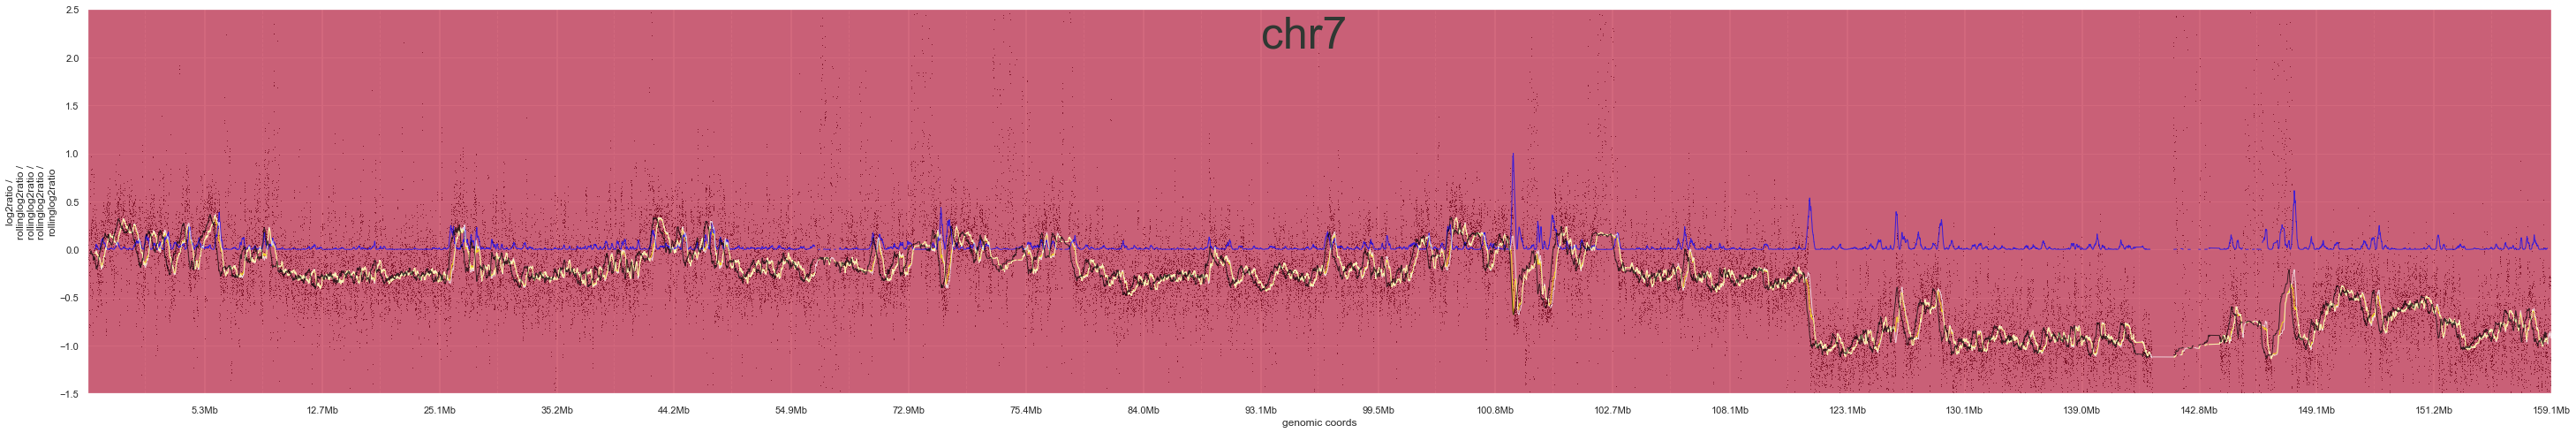

In [213]:
plots = [
    log2,
    log2mean,
    log2diff,
    log2L,
    log2R
]


_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region='chr7', **fig_params)

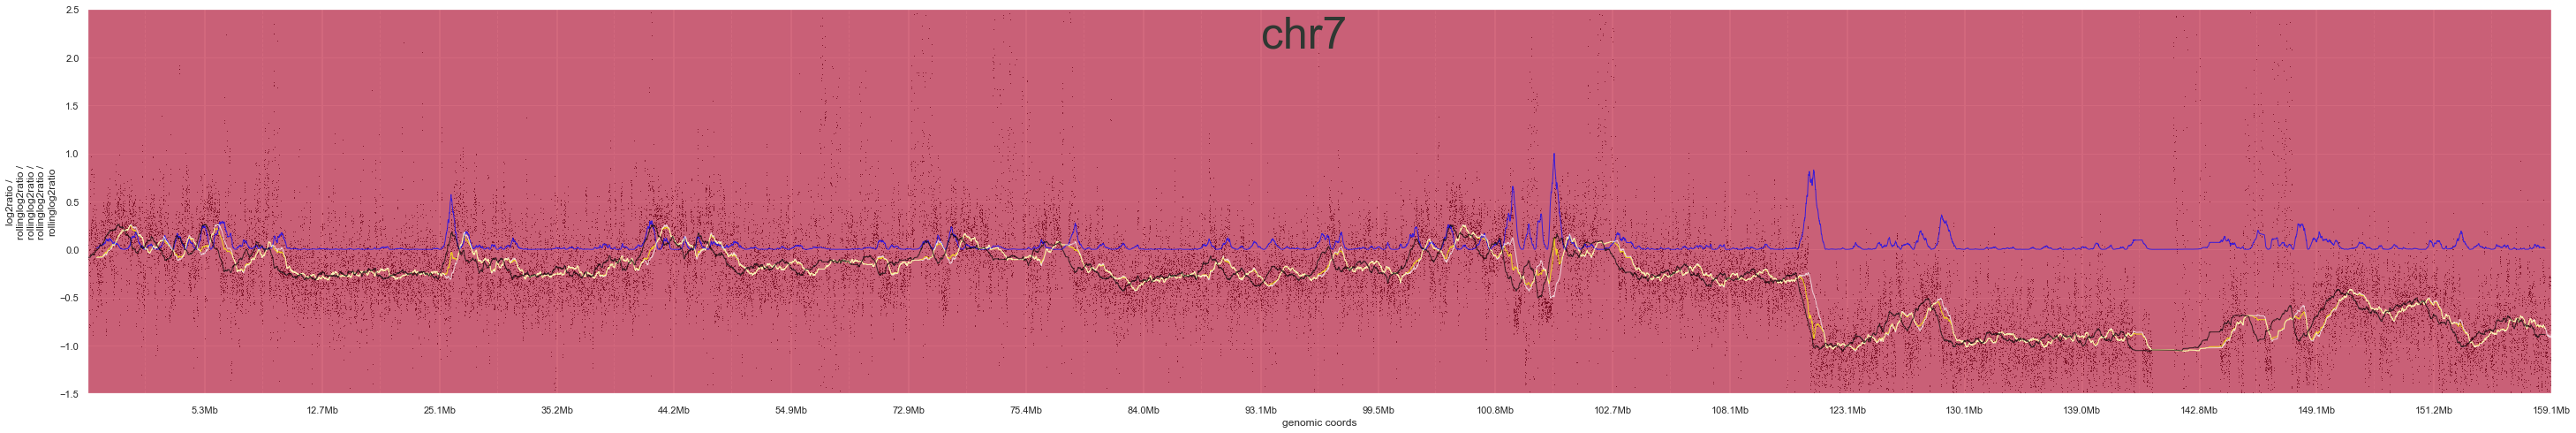

In [214]:
plots = [
    log2,
    log2mean,
    log2diff,
    log2L,
    log2R
]


config = {
    'debug': True, # also export the left and right rolling window values (L/R)
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 40,
            max_PON_std = 100,
        ),
        'normalize':False,
        'expand':0.5, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':250
            }
        }
    }
}
cov2_df = rolling_coverage(cov_df, config)
_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region='chr7', **fig_params)

### adjusting the means using k-mers? not feasible

## merge coverage data into SNP
+ reduce to important columns

In [215]:
snp_df[:2]

Chr    Pos  ExonPos Ref  Depth Alt       VAF  EBscore  \
0  chr1  14930      836   A     64   G  0.046875    0.505   
1  chr1  15820      991   g     13   T  0.846154    2.401   

                                             PoN-Alt  
0  1|2|1|1|3|0|2|2|0|0|1|0|0|0|0|0|1|0|2-0|2|0|0|...  
1  16|0|0|1|0|0|28|0|0|0|0|0|0|0|0|0|3|0|0-0|0|0|...

In [216]:
keep_cols = list(snp_df.columns)[:3] + ['Depth', 'VAF']

snp_df = snp_df.loc[:, keep_cols]
snp_df[:2]

Chr    Pos  ExonPos  Depth       VAF
0  chr1  14930      836     64  0.046875
1  chr1  15820      991     13  0.846154

In [217]:
cov2_df[:2]

Chr    Pos  FullExonPos  ExonPos  Coverage  PONmeanCov  PONmedianCov  \
0  chr1  12600          170      170   0.00000    0.000000           0.0   
1  chr1  12650          220      220   0.06648    0.005664           0.0   

     PONstd  log2ratio  log2ratiomean  log2ratiomeanDiff  log2ratiomeanL  \
0  0.000000        NaN            NaN                NaN             NaN   
1  0.018137   3.552918            NaN                NaN             NaN   

   log2ratiomeanR  
0             NaN  
1             NaN

In [218]:
keep_cols = list(cov2_df.columns)[:4] + ['log2ratiomean', 'log2ratiomeanDiff']
cov2_df = cov2_df.loc[:, keep_cols]

In [219]:
cov2_df[:2]

Chr    Pos  FullExonPos  ExonPos  log2ratiomean  log2ratiomeanDiff
0  chr1  12600          170      170            NaN                NaN
1  chr1  12650          220      220            NaN                NaN

In [227]:
def interpolate_fullexonpon(merge_df):
    chrom_dfs = []
    for chrom in merge_df['Chr'].unique():
        chrom_df = merge_df.query('Chr == @chrom')
        chrom_df = interpolate(chrom_df, 'FullExonPos', ref_col='Pos', expand_limit=1000000)
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    df.loc[:, 'FullExonPos'] = df['FullExonPos'].astype(int)
    return df


def mergeSNPnCov(cov_df, snp_df):
    # merge the data
    merge_df = cov_df.merge(snp_df, on=list(snp_df.columns[:3]), how='outer')
    
    # interpolate FullExonPos
    merge_df = interpolate_fullexonpon(merge_df)

    # interpolate the data
    for col in [col for col in merge_df.columns if 'log2ratio' in col]:
        merge_df = interpolate(merge_df, col, expand_limit=100)
    # reduce to VAF values
    return merge_df.query('VAF == VAF')

In [228]:
merge_df = mergeSNPnCov(cov2_df, snp_df)
merge_df.query('FullExonPos != FullExonPos')

Empty DataFrame
Columns: [Chr, Pos, FullExonPos, ExonPos, log2ratiomean, log2ratiomeanDiff, Depth, VAF]
Index: []

In [229]:
# non-fitters are greatly reduced
merge_df.query('log2ratiomean != log2ratiomean')

Chr        Pos  FullExonPos  ExonPos  log2ratiomean  \
14       chr1      14930          836      836            NaN   
19       chr1      15820          991      991            NaN   
28       chr1      16949         1410     1410            NaN   
35       chr1      17365         1689     1689            NaN   
36       chr1      17375         1699     1699            NaN   
...       ...        ...          ...      ...            ...   
1285150  chrX  156023260     49469650  1835187            NaN   
1285151  chrX  156023266     49469656  1835193            NaN   
1285157  chrX  156024203     49469886  1835423            NaN   
1285158  chrX  156024239     49469922  1835459            NaN   
1285160  chrX  156024251     49469934  1835471            NaN   

         log2ratiomeanDiff  Depth       VAF  
14                     NaN   64.0  0.046875  
19                     NaN   13.0  0.846154  
28                     NaN  182.0  0.038462  
35                     NaN  285.0  0.140351  
36                     NaN  353.0  0.065156  
...                    ...    ...       ...  
1285150                NaN   25.0  0.880000  
1285151                NaN   25.0  0.880000  
1285157                NaN   53.0  0.132075  
1285158                NaN   56.0  0.267857  
1285160                NaN   54.0  0.111111  

[1941 rows x 8 columns]

In [223]:
vaf = dict(
        title='VAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=5,
            alpha=1
        ))

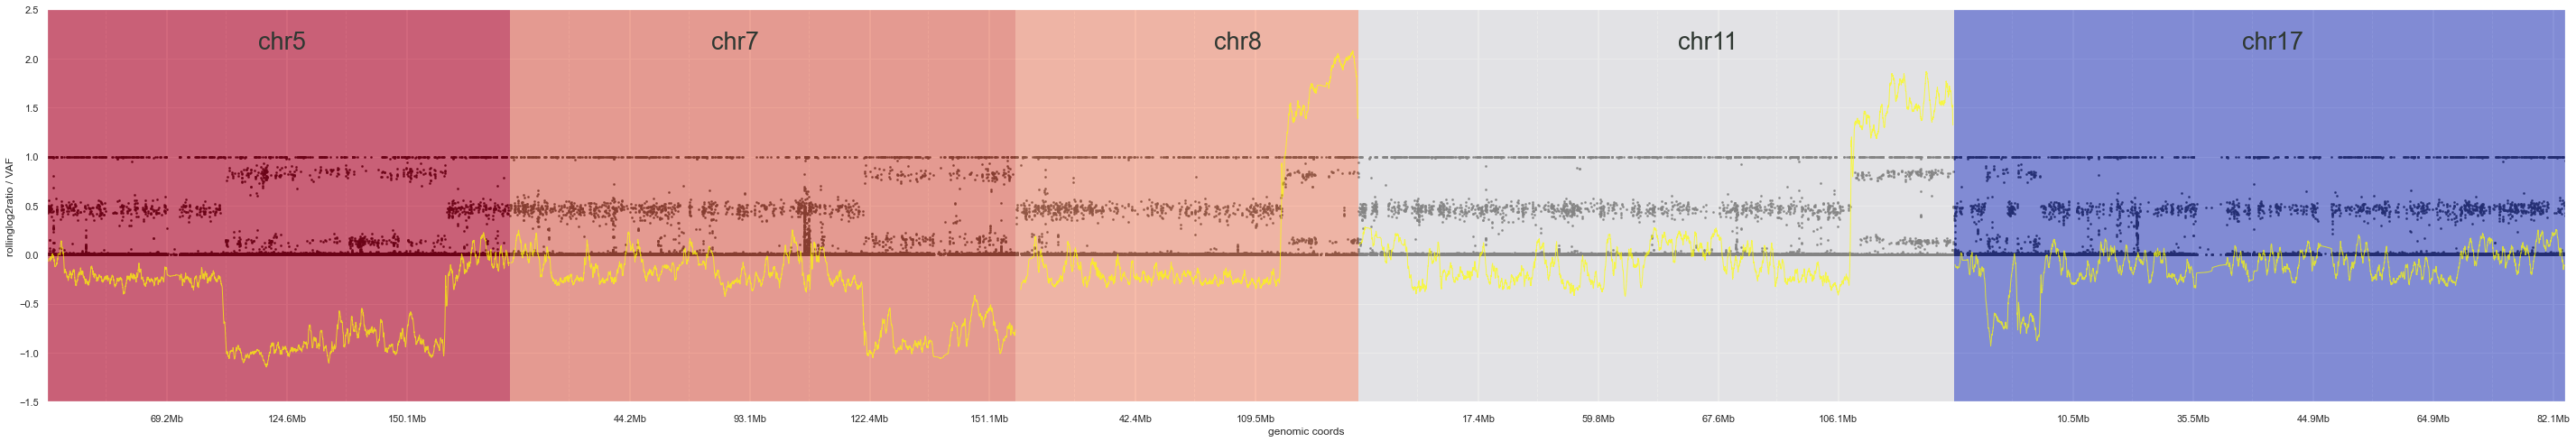

In [230]:

_, _, _, _ = plot_genomic(merge_df, plots=[log2mean, vaf], chroms=chroms, region='', **fig_params)

## heteroSNP rolling window
### first, get the data centers by GMM

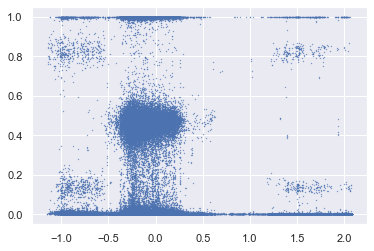

In [314]:
plt.scatter(merge_df['log2ratiomean'], merge_df['VAF'], s=.1);

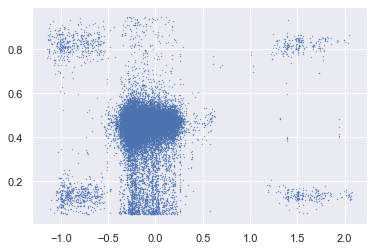

In [315]:
merge = merge_df.query('0.05 < VAF < 0.95 and log2ratiomean == log2ratiomean')
plt.scatter(merge['log2ratiomean'], merge['VAF'], s=.1);

### how many components?

20026
0 components - AIC: -55862.68725271856
0 components - BIC: -55789.97177461811
20026
1 components - AIC: -55862.66546525146
1 components - BIC: -55789.94998715101
23432
2 components - AIC: -33770.68691841429
2 components - BIC: -33697.97144031384
23432
3 components - AIC: -33770.68691841429
3 components - BIC: -33697.97144031384
23432
4 components - AIC: -33770.68691841429
4 components - BIC: -33697.97144031384
20026
5 components - AIC: -55862.70436168824
5 components - BIC: -55789.98888358779
23432
6 components - AIC: -33770.68691841429
6 components - BIC: -33697.97144031384
22998
7 components - AIC: -21889.48543913316
7 components - BIC: -21816.769961032714
20026
8 components - AIC: -55862.69281861307
8 components - BIC: -55789.97734051262
23432
9 components - AIC: -33770.68691841429
9 components - BIC: -33697.97144031384


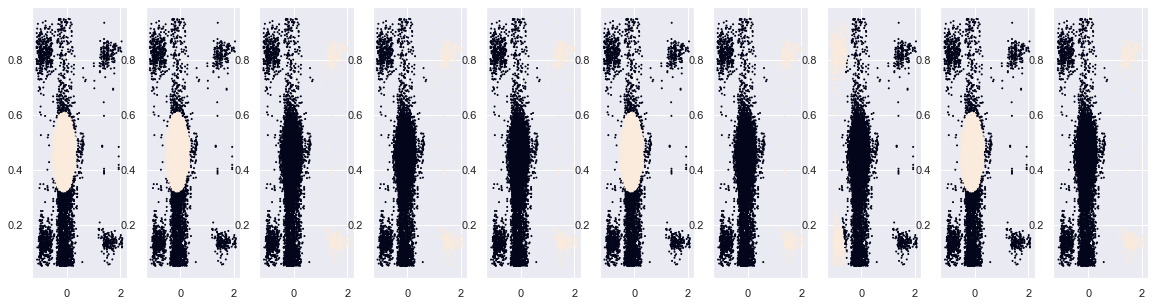

In [375]:
from sklearn.mixture import GaussianMixture as GMM

X = merge[['log2ratiomean', 'VAF']]
X
choice = range(10)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=2, covariance_type='diag').fit(X)
    labels = gmm.predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    print(f'{components} components - AIC:', gmm.aic(X))
    print(f'{components} components - BIC:', gmm.bic(X))

In [379]:
X = merge[['log2ratiomean', 'VAF']]
gmm = GMM(n_components=2, covariance_type='diag').fit(X)
labels = gmm.predict(X)
labels
labels, counts = np.unique(labels, return_counts=True)

print(labels[np.argmax(counts)], np.max(counts))


# plt.scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)

1 20026


In [382]:
gmm.means_

array([[-0.08342037,  0.35020219],
       [-0.12619768,  0.46041181]])

In [386]:
def get_centers(merge_df, runs=10):
    '''
    use GMM to identify the center cluster and get the means from that
    '''
    
    # fit the centers to the data
    X = merge_df.query('0.05 < VAF < 0.95 and log2ratiomean == log2ratiomean')[['log2ratiomean', 'VAF']]
    size = len(X.index)
    for i in range(runs):
        gmm = GMM(n_components=2, covariance_type='diag').fit(X)
        labels = gmm.predict(X)
        # get the size of the 
        _, counts = np.unique(labels, return_counts=True)
        maxcount = np.max(counts)
        print(maxcount)
        if maxcount < size:
            centers = pd.DataFrame(gmm.means_, columns=['log2ratio', 'VAF'])
            # get mean_cov and meanVAF from largest cluster
            mean_cov, meanVAF = centers.loc[np.argmax(counts)]
            size = maxcount
            
        print(f'Run {i}: center size {size}')
    
    return mean_cov, meanVAF, centers

In [387]:
mean_cov, meanVAF, centers = get_centers(merge_df)
meanVAF


20028
Run 0: center size 20028
23432
Run 1: center size 20028
23432
Run 2: center size 20028
23432
Run 3: center size 20028
23432
Run 4: center size 20028
20028
Run 5: center size 20028
20027
Run 6: center size 20027
23432
Run 7: center size 20027
23432
Run 8: center size 20027
23432
Run 9: center size 20027


0.4603910392737032

In [385]:
centers

log2ratio       VAF
0  -0.083420  0.350203
1  -0.126198  0.460412

In [ ]:
config = {
    'debug': True, # also export the left and right rolling window values (L/R)
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 50,
            max_PON_std = 100,
        ),
        'normalize':False,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':100
            }
        }
    },
    'heteroSNP': {
        'filter': dict(
            VAF=(0.05,0.95),
            minDepth=30,
            minEB=0.5
        )
        'normalize': True,
        'data': {
            'absVAF': {
                'sum': 20
            },
            'VAF': {
                'std': 20
            },
            'deltaVAF': {
                'std': 20
            }
        }
    }
}



def expand_SNPdata(merge_df, config):
    '''
    retrieve a few data columns locally to use rolling windows on
    this needs to be done chromosome-wise in order to avoid gap effects
    '''
    
    
    
    
    
    # reduce the snp_df using config limits
    VAFmin = config['VAFlimits'][0]
    VAFmax = config['VAFlimits'][1]
    minDepth = config['minDepth']
    minEBscore = config['minEBscore']
    df = snp_df.query('@VAFmin < VAF < @VAFmax and Depth >= @minDepth and EBscore > @minEBscore')
    
    # find the center
    center = df['VAF'].mean()
    print("heteroSNP centered around", center)
    # offCenter
    df.loc[:,'absVAF'] = np.abs(df['VAF'] - center)
    
    
    # get the local VAF difference chrom based
    dfs = []
    for chrom in df['Chr'].unique():
        chrom_df = df.query('Chr == @chrom')
        chrom_df['deltaVAF'] = np.abs(chrom_df['VAF'] - chrom_df.shift(1)['VAF']).fillna(0)
        dfs.append(chrom_df)
    snp_df = pd.concat(dfs).sort_values('FullExonPos')
    
    return snp_df


def rolling_snp(cov_df, config):
    '''
    cycle through the chroms and perform rolling window computations of snp data set in config
    '''
    
    # split the params dict for easier access
    params = config['coverage']
    filter_params = params['filter']
    data_params = params['data']
    chrom_dfs = []
    for chrom in cov_df['Chr'].unique():
        # restrict to chrom
        chrom_df = cov_df.query('Chr == @chrom').sort_values('FullExonPos')
        # get the params for filtering
        min_cov = filter_params['min_cov']
        min_PON_cov = filter_params['min_PON_cov']
        max_PON_std = filter_params['max_PON_std']
        
        # filter df
        filter_df = chrom_df.query('Coverage >= @min_cov and PONmeanCov >= @min_PON_cov and PONstd < @max_PON_std')
        for data_col in data_params.keys():
            for agg in data_params[data_col].keys():
                window_size = data_params[data_col][agg]
                expand_limit = int(params['expand'] * window_size)
                # print(f"Computing rolling window for {agg} of {data_col} with window size {window_size} on {chrom}")
                chrom_df = one_col_rolling(chrom_df, filter_df, data_col, agg, window_size=window_size, expand_limit=expand_limit, normalize=params['normalize'], debug=config['debug'])
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    return df

In [ ]:
config

In [ ]:
def get_cols(col, agg='mean', modes=['L', 'R', 'Diff', '']):
    '''
    creates for each col a dict for looped computation
    {'L': 'VAVsumL', 'R': 'VAVsumR', 'Diff': 'VAVsumDiff', '': 'VAFsum'}}
    '''
    cols = {mode: col + agg + mode for mode in modes}
    return cols


def get_rolling_metrix_chrom(df, col='VAF', agg='sum', chrom='', window_size=20):
    '''
    take a column and produce rolling windows from it for each chromosome
    '''
    
    df = df.query('Chr == @chrom')
    cols = get_cols(col, agg)
    
    # get the right computation
    if agg =='std':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].std()
    if agg == 'sum':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].sum()
    if agg == 'mean':
        df.loc[:, cols['L']] = df.rolling(window_size)[col].mean()

    
    # get the right window by shifting the left
    df.loc[:, cols['R']] = df.shift(-window_size + 1)[cols['L']]
    # fillup the margins
    df.loc[:, cols['L']] = df[cols['L']].fillna(method='bfill')
    df.loc[:, cols['R']] = df[cols['R']].fillna(method='ffill')
    return df


def get_rolling_metrix(df, col='VAF', agg='mean', window_size=20, normalize=True):
    '''
    wrapper to apply get_rolling_metrix_chrom per chromosome
    '''
    
    chrom_dfs = []
    for chrom in df['Chr'].unique():
        chrom_df = get_rolling_metrix_chrom(df, col=col, agg=agg, chrom=chrom, window_size=window_size)
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    cols = get_cols(col, agg)
    if normalize:
    # normalize the data
        print('Normalizing data')
        _min = df[cols['L']].min()
        _max = df[cols['L']].max()
        for side in ['L', 'R']:
            c = cols[side]
            df[c] = (df[c] - _min) / (_max - _min)
    # get the Diff
    df[cols['Diff']] = ((df[cols['L']] - df[cols['R']]) / 2) + 0.5
    df[cols['']] = df[cols['L']] * df[cols['Diff']] + df[cols['R']] * (1 - df[cols['Diff']])
    return df




In [ ]:
rollingSNP_df = rolling_it(snp_df, config['heteroSNP'])
rollingSNP_df

In [ ]:
cov_df = rolling_it(cov_df, config['coverage'])

In [ ]:
def add_rolling_data(snp_df, cov_df, config):
    '''
    add the rolling metrices needed to get local data
    '''
    
    # add extra cols to snp_df
    snp_df = expand_SNPdata(snp_df, config['heteroSNP'])
    
    # get the rolling metrices for snp_df
    snp_df = rolling_it(snp_df, config['heteroSNP'])
    # get the rolling metrices for cov_df
    cov_df = rolling_it(cov_df, config['coverage'])
    
    return snp_df, cov_df

In [ ]:
snp_df, cov_df = add_rolling_data(snp_df, cov_df, config)

In [ ]:
snp_df.to_csv(os.path.join(output_path, 'heteroSNP/01_A.snp'), sep='\t', index=False)
cov_df.to_csv(os.path.join(output_path, 'covDif/01_A.cov'), sep='\t', index=False)

### center VAF

In [ ]:
def centerVAF(snp_df):
    '''
    attempting to correct for off-center VAF means
    '''

    # get the VAF mean
    meanVAF = snp_df.query('0.05 < VAF < 0.95')['VAF'].mean()
    # store the original VAF in orgVAF
    snp_df['orgVAF'] = snp_df['VAF']
    snp_df.loc[snp_df['VAF'] <= meanVAF,
               'VAF'] = snp_df['VAF'] / meanVAF * 0.5
    snp_df.loc[snp_df['VAF'] > meanVAF, 'VAF'] = 0.5 + \
        0.5 * (snp_df['VAF'] - meanVAF) / (1-meanVAF)
    newMeanVAF = snp_df.query('0.05 < VAF < 0.95')['VAF'].mean()
    return snp_df, meanVAF, newMeanVAF